# **Directional Fields and Isoclines**

---

### **Introduction**
This notebook goes over the notion of directional fields and isoclines.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**January 26, 2025**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Recall that in general, it is not possible to write down explicit solution formulas to nonlinear equations. We saw that this can be difficult even in the case of simple first order separable equations. 

Here we develop a geometric way of looking at differential equations that allows us to sketch sample solutions curves.

Given the equation
$$
y'(t) = f(t, y(t)), \; t \in I,
$$
the natural geometric interpretation is that 
$$
\text{the slope of the tangent line to the solution curve} \; y \; \text{at} \; (t,y) = \; f \; \text{evaluated at} \; (t, y).
$$

If we had a solution $y: I \to \mathbb{R}$, for each $t \in I$ we can draw these so-called **lineal elements**, which are small line segments tangent to the curve $y$ with slope $y'(t)$, at each point $(t, y(t))$ in the plane. 

The idea here is that even if we were to erase the solution curve $y$, we can recover it by looking at these lineal elements, which you can draw as long as $f: I \times \mathbb{R} \to \mathbb{R}$ is given.

> **Example:**
> Consider the equation $y'(t) = y(t), \; t \in \mathbb{R}$. In this example, $f: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ is given by $f(t, y) = y$. Therefore the slope of each lineal element at a point the point $(t, y) \in \mathbb{R}^2$ is $y$. We note that since this equation is autonomous, sketching out the directional field is fairly straightforward as the slope of the lineal elements is constant along horizontal lines. Once we have the directional field, we can sketch out the solution curves by following the direction of the lineal elements.

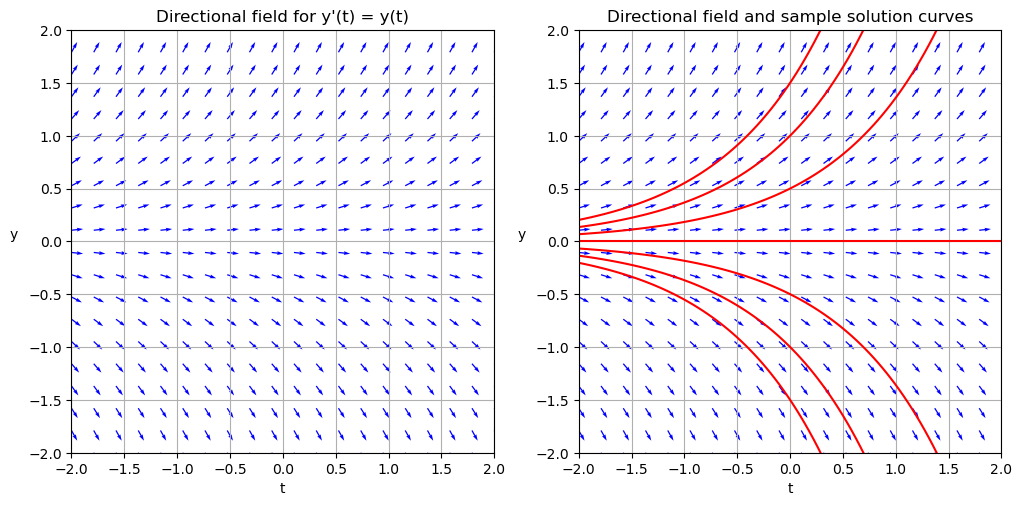

In [46]:
def f(t, y):
    return y


t = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
T, Y = np.meshgrid(t, y)

U = 1
V = f(T, Y)
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.quiver(T, Y, U2, V2, angles='xy', color='blue')
ax1.set_xlabel('t')
ax1.set_ylabel('y', rotation=0, labelpad=10)
ax1.set_title("Directional field for y'(t) = y(t)")
ax1.grid()
ax1.set_aspect('equal', adjustable='box')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)

ax2.quiver(T, Y, U2, V2, angles='xy', color='blue')
ax2.set_xlabel('t')
ax2.set_ylabel('y', rotation=0, labelpad=10)
ax2.set_title("Directional field and sample solution curves")
ax2.grid()
ax2.set_aspect('equal', adjustable='box')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)

t_vals = np.linspace(-2, 2, 100)
for y0 in [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]:
    y_vals = y0 * np.exp(t_vals)
    ax2.plot(t_vals, y_vals, 'r')

plt.show()

Directional fields can be hard to sketch, especially if the ODE is non-autonomous. Here we introduce the notion of *isoclines* which can simplify the process.  
> **Definition**  
> An *isocline* is a curve $\gamma \subseteq \mathbb{R}^2$ in the $ty$-plane on which the vector field $f: \mathbb{R}^2 \to \mathbb{R}$ is constant. 
> 
> Since the slopes of lineal elements are equal to values of $f$, another way to phrase this is that *isoclines are curves on which the lineal elements have constant slope*. Here's an example to illustrate their utility. 

> **Example**  
> Consider the differential equation $y'(t) = t y(t), t \in \mathbb{R}$. Though it's possible to draw the directional field by computing the value of $f(t,y)$ at every point $(t,y)$, it's a lot easier to find the isoclines associated to $f$, as we'll obtain a family of curves on which the lineal elements have constant slope. 
> 
> To do so we set $f(t,y) = ty = m$ for some constant $m$. 
> 
> - When $m = 0$, either $y = 0$ or $t = 0$. On these two lines the slopes are 0;
> - when $m = 1$, $t y = 1$, or $y = \frac{1}{t}$. On this curve the lineal elements have slope 1;
> - when $m = -1$, $y = \frac{-1}{t}$. On this curve the lineal elements have slope $-1$;
> - etc.
> <p align="center">  
> <img src="diagrams/07-sketch1.png" alt="Isoclines" width="600"/>  
> </p>  
>
> Now we can trace the isoclines (red curves) and use them to draw the entire directional field. Once we have the directional field we can sketch the solution curves (black curves). It's important to note that **isoclines are not solutions curves**, though sometimes they can be. In this case, $y = 0$ is both an isocline and a solution.


> **Example:**
> 
> Consider the ODE given by $y'(x) = \frac{1}{x^2 + (y(x))^2}, x \in \mathbb{R}$. This is an instructive example because 
> 1. it looks difficult to write down an explicit solution formula;
> 2. sketching the directional field is computationally intensive.
> 
> If we set $f(x,y) = \frac{1}{x^2 + y^2} = m$ for some constant $m > 0$ ($m$ can't be negative, since $x^2 + y^2 \ge 0$ for all $x,y$), we see that this is equivalent to demanding $x^2 + y^2 = \frac{1}{m}$, which is a circle centered at $(0,0)$ with radius $\frac{1}{\sqrt{m}}$. So the isoclines are concentric circles, and the lineal elements have smaller slopes on circles with larger radii and vice versa.
>
> <p align="center">  
> <img src="diagrams/07-sketch2.png" alt="More isoclines" width="600"/>  
> </p>  
>
> The red curves are the isoclines and the black curves are solution curves.

> **Example:**
> 
> Consider the first order differential equation 
> $$
> y'(x) = x - y(x), \; x \in \mathbb{R}
> $$
> The $m$-isoclines are of the form 
> $$
> y(x) = x - m, \; x \in \mathbb{R}
> $$
> Also note that $y_p(x) = x-1$ is both an isocline and a solution to the equation. If we were to sketch out sample solution curves, we see that $y_p$ acts as a "barrier" that divides the $x$-$y$ plane in half, since by uniqueness solution curves cannot cross.

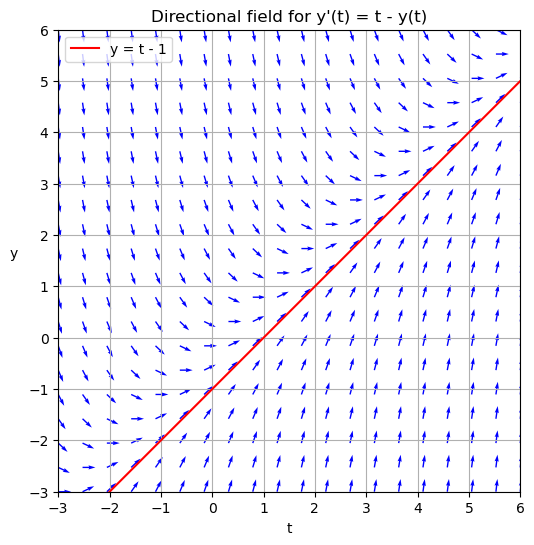

In [45]:
def f(t, y):
    return t - y

t = np.linspace(-3, 6, 20)
y = np.linspace(-3, 6, 20)
T, Y = np.meshgrid(t, y)

U = 1
V = f(T, Y)
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

fig, ax = plt.subplots(figsize=(8, 6))

ax.quiver(T, Y, U2, V2, angles='xy', color='blue')
ax.set_xlabel('t')
ax.set_ylabel('y', rotation=0, labelpad=10)
ax.set_title("Directional field for y'(t) = t - y(t)")
ax.grid()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 6)
ax.set_ylim(-3, 6)

t_vals = np.linspace(-3, 6, 100)
y_vals = t_vals - 1
ax.plot(t_vals, y_vals, 'r', label='y = t - 1')
ax.legend(loc = 'upper left')

plt.show()
